In [663]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy import stats
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import datasets
import statsmodels.api as sm

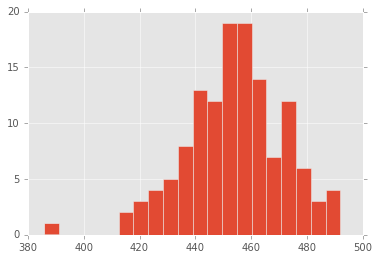

In [664]:
reading_8 = pd.read_csv('class2011_reading_8_division.csv').drop('Unnamed: 0',axis=1)
reading_8_agg = reading_8[reading_8.GENDER.isnull()&reading_8.FEDERAL_RACE_CODE.isnull()&reading_8.DISABILITY_FLAG.isnull()&reading_8.LEP_FLAG.isnull()&reading_8.DISADVANTAGED_FLAG.isnull()]
reading_8_agg.index = reading_8_agg[['DIV_NUM','DIV_NAME']]
reading_8_agg = reading_8_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
reading_8_agg.AVG_SOL_SCALE_SCORE.hist(bins=20)

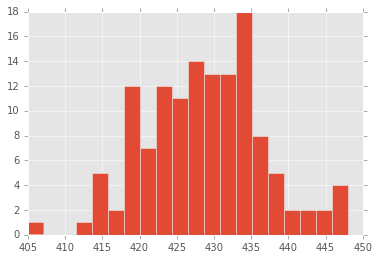

In [665]:
writing_8 = pd.read_csv('class2011_writing_8_division.csv').drop('Unnamed: 0',axis=1)
writing_8_agg = writing_8[writing_8.GENDER.isnull()&writing_8.FEDERAL_RACE_CODE.isnull()&writing_8.DISABILITY_FLAG.isnull()&writing_8.LEP_FLAG.isnull()&writing_8.DISADVANTAGED_FLAG.isnull()]
writing_8_agg.index = writing_8_agg[['DIV_NUM','DIV_NAME']]
writing_8_agg = writing_8_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
writing_8_agg.AVG_SOL_SCALE_SCORE.hist(bins=20)

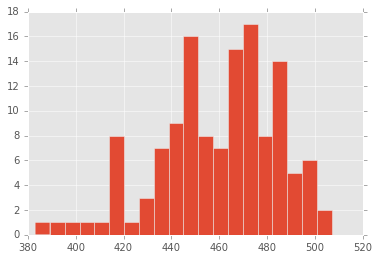

In [666]:
math_8 = pd.read_csv('class2011_math_8_division.csv').drop('Unnamed: 0',axis=1)
math_8_agg = math_8[math_8.GENDER.isnull()&math_8.FEDERAL_RACE_CODE.isnull()&math_8.DISABILITY_FLAG.isnull()&math_8.LEP_FLAG.isnull()&math_8.DISADVANTAGED_FLAG.isnull()]
math_8_agg.index = math_8_agg[['DIV_NUM','DIV_NAME']]
math_8_agg = math_8_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
math_8_agg.AVG_SOL_SCALE_SCORE.hist(bins=20)

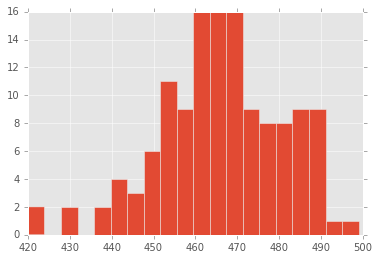

In [667]:
science_8 = pd.read_csv('class2011_science_8_division.csv').drop('Unnamed: 0',axis=1)
science_8_agg = science_8[science_8.GENDER.isnull()&science_8.FEDERAL_RACE_CODE.isnull()&science_8.DISABILITY_FLAG.isnull()&science_8.LEP_FLAG.isnull()&science_8.DISADVANTAGED_FLAG.isnull()]
science_8_agg.index = science_8_agg[['DIV_NUM','DIV_NAME']]
science_8_agg = science_8_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
science_8_agg.AVG_SOL_SCALE_SCORE.hist(bins=20)

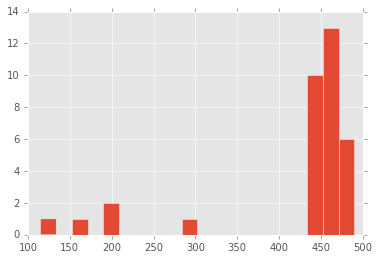

In [668]:
history_8 = pd.read_csv('class2011_history_8_division.csv').drop('Unnamed: 0',axis=1)
history_8_agg = history_8[history_8.GENDER.isnull()&history_8.FEDERAL_RACE_CODE.isnull()&history_8.DISABILITY_FLAG.isnull()&history_8.LEP_FLAG.isnull()&history_8.DISADVANTAGED_FLAG.isnull()]
history_8_agg.index = history_8_agg[['DIV_NUM','DIV_NAME']]
history_8_agg = history_8_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
history_8_agg.AVG_SOL_SCALE_SCORE.hist(bins=20)

In [669]:
reading_8_agg = reading_8_agg.rename(columns={'AVG_SOL_SCALE_SCORE':'READING_SCORE','PASS_RATE':'READING_PASS_RATE'})
writing_8_agg = writing_8_agg.rename(columns={'AVG_SOL_SCALE_SCORE':'WRITING_SCORE','PASS_RATE':'WRITING_PASS_RATE'})
math_8_agg = math_8_agg.rename(columns={'AVG_SOL_SCALE_SCORE':'MATH_SCORE','PASS_RATE':'MATH_PASS_RATE'})
science_8_agg = science_8_agg.rename(columns={'AVG_SOL_SCALE_SCORE':'SCIENCE_SCORE','PASS_RATE':'SCIENCE_PASS_RATE'})
history_8_agg = history_8_agg.rename(columns={'AVG_SOL_SCALE_SCORE':'HISTORY_SCORE','PASS_RATE':'HISTORY_PASS_RATE'})

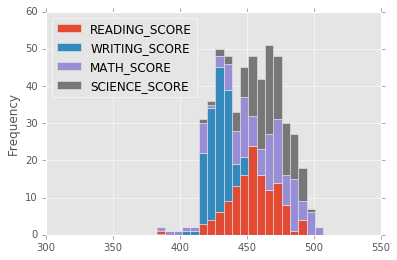

In [670]:
sol_8_agg = pd.concat([reading_8_agg,writing_8_agg,math_8_agg,science_8_agg],axis=1).dropna()
sol_8_agg.drop(['READING_PASS_RATE','WRITING_PASS_RATE','MATH_PASS_RATE','SCIENCE_PASS_RATE'],axis=1).plot.hist(bins=20,stacked=True,xlim=(300,550))

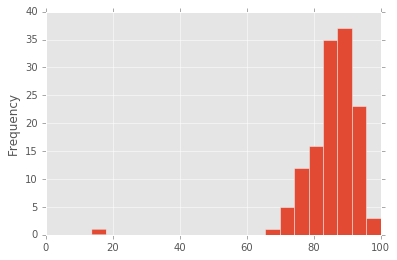

In [671]:
diploma = pd.read_csv('class2011_diploma_division.csv').drop('Unnamed: 0',axis=1)
diploma.DIPLOMA_CNT = round(diploma.DIPLOMA_CNT)
diploma.DROPOUT_CNT = round(diploma.DROPOUT_CNT)
diploma.DROPOUT_RATE = diploma.DROPOUT_CNT/diploma.COHORT_CNT*100
diploma_agg = diploma[diploma.GENDER.isnull()&diploma.FEDERAL_RACE_CODE.isnull()&diploma.DISABILITY_FLAG.isnull()&diploma.LEP_FLAG.isnull()&diploma.DISADVANTAGED_FLAG.isnull()]
diploma_agg.index = diploma_agg[['DIV_NUM','DIV_NAME']]
diploma_agg = diploma_agg.drop(['DIV_NUM','DIV_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_agg.DIPLOMA_RATE.plot.hist(bins=20,xlim=(0,100))

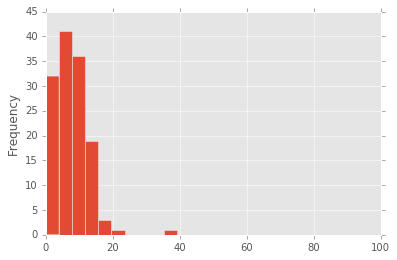

In [672]:
diploma_agg.DROPOUT_RATE.plot.hist(bins=10,xlim=(0,100))

In [673]:
data = pd.concat([sol_8_agg,diploma_agg],axis=1).dropna()
train = data[:110]
test = data[-20:]

In [674]:
enet = lm.ElasticNetCV(l1_ratio=[.0000001,.000001,.000002,.000005,.00001,.00002,.00005,.0001,.0002,.0005,.001], eps=1e-6, n_alphas=100, cv=5)
enet.fit(train[['READING_SCORE','WRITING_SCORE','MATH_SCORE','SCIENCE_SCORE','READING_PASS_RATE','WRITING_PASS_RATE','MATH_PASS_RATE','SCIENCE_PASS_RATE']],train['DIPLOMA_RATE'])

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=1e-06, fit_intercept=True,
       l1_ratio=[1e-07, 1e-06, 2e-06, 5e-06, 1e-05, 2e-05, 5e-05, 0.0001, 0.0002, 0.0005, 0.001],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [675]:
alpha = enet.alpha_
l1_ratio = enet.l1_ratio_
alpha, l1_ratio

(33.072102401585575, 5.0000000000000004e-06)

In [676]:
enet.coef_

array([ 0.08773741, -0.00343186, -0.01659838,  0.08277926,  0.0983059 ,
       -0.03273777,  0.02206992,  0.05383283])

In [677]:
score_enet = enet.score(test[['READING_SCORE','WRITING_SCORE','MATH_SCORE','SCIENCE_SCORE','READING_PASS_RATE','WRITING_PASS_RATE','MATH_PASS_RATE','SCIENCE_PASS_RATE']],test['DIPLOMA_RATE'])
score_enet

0.58834991795860181

In [678]:
enet_pos = lm.ElasticNetCV(l1_ratio=[0,.00001,.00005,.00008,.00009,.0001,.00011,.00012,.00015,.0002], eps=1e-6, n_alphas=100, cv=5, positive=True)
enet_pos.fit(train[['READING_SCORE','WRITING_SCORE','MATH_SCORE','SCIENCE_SCORE','READING_PASS_RATE','WRITING_PASS_RATE','MATH_PASS_RATE','SCIENCE_PASS_RATE']],train['DIPLOMA_RATE'])

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=1e-06, fit_intercept=True,
       l1_ratio=[0, 1e-05, 5e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00015, 0.0002],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=True, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [679]:
alpha_pos = enet_pos.alpha_
l1_ratio_pos = enet_pos.l1_ratio_
alpha_pos, l1_ratio_pos

(30.843153388183278, 5.0000000000000002e-05)

In [680]:
enet_pos.coef_

array([ 0.0785652 ,  0.        ,  0.        ,  0.07328889,  0.09992707,
        0.        ,  0.        ,  0.05248289])

In [681]:
score_enet_pos = enet_pos.score(test[['READING_SCORE','WRITING_SCORE','MATH_SCORE','SCIENCE_SCORE','READING_PASS_RATE','WRITING_PASS_RATE','MATH_PASS_RATE','SCIENCE_PASS_RATE']],test['DIPLOMA_RATE'])
score_enet_pos

0.59804902073373956

In [682]:
dropout_model = sm.OLS(data['DROPOUT_RATE'],sm.add_constant(data[['READING_PASS_RATE']]))
dropout_results = dropout_model.fit()
dropout_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DROPOUT_RATE   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     75.10
Date:                Wed, 25 May 2016   Prob (F-statistic):           1.68e-14
Time:                        12:54:16   Log-Likelihood:                -342.46
No. Observations:                 130   AIC:                             688.9
Df Residuals:                     128   BIC:                             694.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                33.1689      2.982     11.123      0.000        27.269    39.069
READING_PASS_RATE    -0.3282      0.038     -8.666      0.000        -0.403    -0.253
==============================================================================
Omnibus:                        1.890   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.941
Skew:                           0.255   Prob(JB):                        0.379
Kurtosis:                       2.687   Cond. No.                         788.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [683]:
diploma_model = sm.OLS(data['DIPLOMA_RATE'],sm.add_constant(data[['READING_PASS_RATE','SCIENCE_PASS_RATE']]))
diploma_results = diploma_model.fit()
diploma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DIPLOMA_RATE   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     36.60
Date:                Wed, 25 May 2016   Prob (F-statistic):           2.80e-13
Time:                        12:54:17   Log-Likelihood:                -391.53
No. Observations:                 130   AIC:                             789.1
Df Residuals:                     127   BIC:                             797.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                43.8305      5.697      7.693      0.000        32.557    55.104
READING_PASS_RATE     0.3788      0.081      4.653      0.000         0.218     0.540
SCIENCE_PASS_RATE     0.1414      0.095      1.484      0.140        -0.047     0.330
==============================================================================
Omnibus:                        1.767   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.534
Skew:                          -0.127   Prob(JB):                        0.464
Kurtosis:                       2.532   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [684]:
dropout_model = sm.RLM(data['DROPOUT_RATE'],sm.add_constant(data[['READING_SCORE','WRITING_SCORE','SCIENCE_SCORE']]))
dropout_results = dropout_model.fit()
dropout_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:           DROPOUT_RATE   No. Observations:                  130
Model:                            RLM   Df Residuals:                      126
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        12:54:17                                         
No. Iterations:                    14                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            58.9182     19.547      3.014      0.003        20.607    97.229
READING_SCORE    -0.1293      0.032     -4.010      0.000        -0.193    -0.066
WRITING_SCORE     0.0920      0.070      1.322      0.186        -0.044     0.229
SCIENCE_SCORE    -0.0692      0.038     -1.809      0.070        -0.144     0.006
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [685]:
diploma_model = sm.RLM(data['DIPLOMA_RATE'],sm.add_constant(data[['READING_SCORE','SCIENCE_SCORE']]))
diploma_results = diploma_model.fit()
diploma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:           DIPLOMA_RATE   No. Observations:                  130
Model:                            RLM   Df Residuals:                      127
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        12:54:17                                         
No. Iterations:                    15                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -20.6993     13.856     -1.494      0.135       -47.856     6.458
READING_SCORE     0.1530      0.041      3.687      0.000         0.072     0.234
SCIENCE_SCORE     0.0797      0.049      1.642      0.101        -0.015     0.175
=================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [687]:
diploma_school = pd.read_csv('class2011_diploma_school.csv').drop('Unnamed: 0',axis=1)
diploma_school_agg = diploma_school[diploma_school.GENDER.isnull()&diploma_school.FEDERAL_RACE_CODE.isnull()&diploma_school.DISABILITY_FLAG.isnull()&diploma_school.LEP_FLAG.isnull()&diploma_school.DISADVANTAGED_FLAG.isnull()]
diploma_school_agg.index = diploma_school_agg[['DIV_NAME','SCH_NAME']]
diploma_school_agg = diploma_school_agg.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_school_agg['DROPOUT_RATE'] = diploma_school_agg.DROPOUT_CNT/diploma_school_agg.COHORT_CNT
diploma_school_agg

,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE,DIPLOMA_CNT,DROPOUT_CNT
"(Accomack County, Arcadia High)",140,80.00,0.0857,112.0000,11.9980
"(Accomack County, Chincoteague High)",52,82.69,0.1154,42.9988,6.0008
"(Accomack County, Nandua High)",194,76.80,0.1443,148.9920,27.9942
"(Albemarle County, Albemarle High)",460,93.48,0.0413,430.0080,18.9980
"(Albemarle County, Monticello High)",302,92.38,0.0397,278.9876,11.9894
"(Albemarle County, Murray High)",30,50.00,0.1333,15.0000,3.9990
"(Albemarle County, Western Albemarle High)",239,97.91,0.0084,234.0049,2.0076
"(Alexandria City, T.C. Williams High)",817,79.19,0.1506,646.9823,123.0402
"(Alleghany County, Alleghany High)",213,92.96,0.0563,198.0048,11.9919
"(Amelia County, Amelia County High)",131,84.73,0.0840,110.9963,11.0040


In [744]:
college_school = pd.read_csv('class2011_college_school.csv').drop('Unnamed: 0',axis=1)
college_school_agg = college_school[college_school.GENDER.isnull()&college_school.FEDERAL_RACE_CODE.isnull()&college_school.DISABILITY_FLAG.isnull()&college_school.LEP_FLAG.isnull()&college_school.DISADVANTAGED_FLAG.isnull()&college_school.PS_INSTITUTION_TYPE.isnull()]
college_school_agg.index = college_school_agg[['DIV_NAME','SCH_NAME']]
college_school_agg = college_school_agg.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_GRADUATE_CNT','PS_INSTITUTION_TYPE'],axis=1)

C:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LinregressResult(slope=3.1534386311667846, intercept=-3.4886172277646175, rvalue=0.82803418911983262, pvalue=1.1870968825980098e-81, stderr=0.11992775294374219)

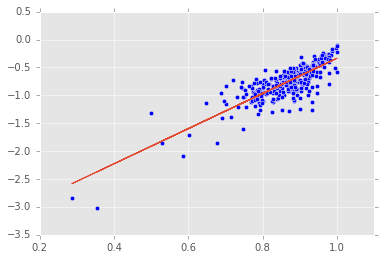

In [822]:
ps_data = pd.concat([college_school_agg,diploma_school_agg],axis=1).dropna()
ps_data['PS_RATE'] = ps_data.PS_ENROLLMENT_CNT/ps_data.COHORT_CNT
ps_data['INV_DROPOUT_RATE'] = (1-ps_data.DROPOUT_RATE)
ps_data.DIPLOMA_RATE = ps_data.DIPLOMA_RATE/100
ps_data['LOG_PS_RATE'] = np.log(ps_data.PS_RATE)
ps_data['LOG_DIPLOMA_RATE'] = np.log(ps_data.DIPLOMA_RATE)
ps_data['LOG_INV_DROPOUT_RATE'] = np.log(ps_data.INV_DROPOUT_RATE)
diploma_ps_regress = stats.linregress(ps_data['DIPLOMA_RATE'],ps_data['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data['DIPLOMA_RATE'],diploma_ps_regress[1]+diploma_ps_regress[0]*ps_data['DIPLOMA_RATE'])
ax.scatter(ps_data['DIPLOMA_RATE'], ps_data['LOG_PS_RATE'])
diploma_ps_regress

In [779]:
diploma_ps_model = sm.RLM(ps_data['LOG_PS_RATE'],sm.add_constant(ps_data['DIPLOMA_RATE']))
diploma_ps_results = diploma_ps_model.fit()
diploma_ps_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                  319
Model:                            RLM   Df Residuals:                      317
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:19:51                                         
No. Iterations:                    22                                         
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.5041      0.095    -37.036      0.000        -3.690    -3.319
DIPLOMA_RATE     3.1849      0.109     29.308      0.000         2.972     3.398
================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

LinregressResult(slope=4.7108548919222555, intercept=-5.1359584266920191, rvalue=0.76679625922627759, pvalue=5.3774140644958552e-63, stderr=0.22148845927033414)

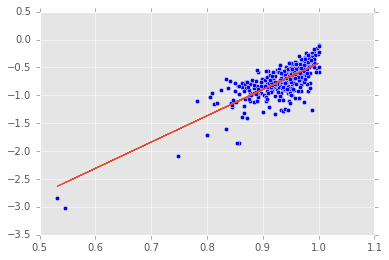

In [820]:
dropout_ps_regress = stats.linregress(ps_data['INV_DROPOUT_RATE'],ps_data['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data['INV_DROPOUT_RATE'],dropout_ps_regress[1]+dropout_ps_regress[0]*ps_data['INV_DROPOUT_RATE'])
ax.scatter(ps_data['INV_DROPOUT_RATE'], ps_data['LOG_PS_RATE'])
dropout_ps_regress

In [782]:
dropout_ps_model = sm.RLM(ps_data['LOG_PS_RATE'],sm.add_constant(ps_data['INV_DROPOUT_RATE']))
dropout_ps_results = dropout_ps_model.fit()
dropout_ps_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                  319
Model:                            RLM   Df Residuals:                      317
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:20:28                                         
No. Iterations:                    25                                         
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -5.0266      0.197    -25.485      0.000        -5.413    -4.640
INV_DROPOUT_RATE     4.6111      0.212     21.768      0.000         4.196     5.026
====================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [752]:
diploma_school_disadvantaged = diploma_school[diploma_school.GENDER.isnull()&diploma_school.FEDERAL_RACE_CODE.isnull()&diploma_school.DISABILITY_FLAG.isnull()&diploma_school.LEP_FLAG.isnull()&(diploma_school.DISADVANTAGED_FLAG=='Y')]
diploma_school_disadvantaged.index = diploma_school_disadvantaged[['DIV_NAME','SCH_NAME']]
diploma_school_disadvantaged = diploma_school_disadvantaged.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_school_disadvantaged['DROPOUT_RATE'] = diploma_school_disadvantaged.DROPOUT_CNT/diploma_school_disadvantaged.COHORT_CNT

college_school_disadvantaged = college_school[college_school.GENDER.isnull()&college_school.FEDERAL_RACE_CODE.isnull()&college_school.DISABILITY_FLAG.isnull()&college_school.LEP_FLAG.isnull()&(college_school.DISADVANTAGED_FLAG=='Y')&college_school.PS_INSTITUTION_TYPE.isnull()]
college_school_disadvantaged.index = college_school_disadvantaged[['DIV_NAME','SCH_NAME']]
college_school_disadvantaged = college_school_disadvantaged.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_GRADUATE_CNT','PS_INSTITUTION_TYPE'],axis=1)

LinregressResult(slope=2.428634207363773, intercept=-3.1272227672043593, rvalue=0.60254311764207269, pvalue=4.0514959400915108e-32, stderr=0.18299726977580449)

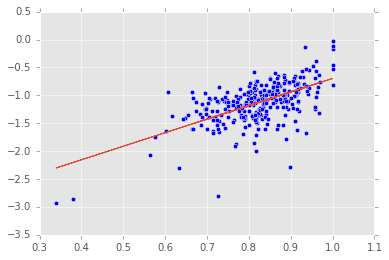

In [818]:
ps_data_disadvantaged = pd.concat([college_school_disadvantaged,diploma_school_disadvantaged],axis=1).dropna()
ps_data_disadvantaged['PS_RATE'] = ps_data_disadvantaged.PS_ENROLLMENT_CNT/ps_data_disadvantaged.COHORT_CNT
ps_data_disadvantaged['INV_DROPOUT_RATE'] = (1-ps_data_disadvantaged.DROPOUT_RATE)
ps_data_disadvantaged.DIPLOMA_RATE = ps_data_disadvantaged.DIPLOMA_RATE/100
ps_data_disadvantaged['LOG_PS_RATE'] = np.log(ps_data_disadvantaged.PS_RATE)
ps_data_disadvantaged['LOG_DIPLOMA_RATE'] = np.log(ps_data_disadvantaged.DIPLOMA_RATE)
ps_data_disadvantaged['LOG_INV_DROPOUT_RATE'] = np.log(ps_data_disadvantaged.INV_DROPOUT_RATE)
ps_disadvantaged_regress = stats.linregress(ps_data_disadvantaged['DIPLOMA_RATE'],ps_data_disadvantaged['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data_disadvantaged['DIPLOMA_RATE'],ps_disadvantaged_regress[1]+ps_disadvantaged_regress[0]*ps_data_disadvantaged['DIPLOMA_RATE'])
ax.scatter(ps_data_disadvantaged['DIPLOMA_RATE'], ps_data_disadvantaged['LOG_PS_RATE'])
ps_disadvantaged_regress

In [784]:
diploma_ps_model_disadvantaged = sm.RLM(ps_data_disadvantaged['LOG_PS_RATE'],sm.add_constant(ps_data_disadvantaged['DIPLOMA_RATE']))
diploma_ps_results_disadvantaged = diploma_ps_model_disadvantaged.fit()
diploma_ps_results_disadvantaged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                  311
Model:                            RLM   Df Residuals:                      309
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:21:09                                         
No. Iterations:                    19                                         
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.0129      0.134    -22.496      0.000        -3.275    -2.750
DIPLOMA_RATE     2.3136      0.162     14.256      0.000         1.996     2.632
================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [756]:
diploma_school_disadvantaged_N = diploma_school[diploma_school.GENDER.isnull()&diploma_school.FEDERAL_RACE_CODE.isnull()&diploma_school.DISABILITY_FLAG.isnull()&diploma_school.LEP_FLAG.isnull()&(diploma_school.DISADVANTAGED_FLAG=='N')]
diploma_school_disadvantaged_N.index = diploma_school_disadvantaged_N[['DIV_NAME','SCH_NAME']]
diploma_school_disadvantaged_N = diploma_school_disadvantaged_N.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_school_disadvantaged_N['DROPOUT_RATE'] = diploma_school_disadvantaged_N.DROPOUT_CNT/diploma_school_disadvantaged_N.COHORT_CNT

college_school_disadvantaged_N = college_school[college_school.GENDER.isnull()&college_school.FEDERAL_RACE_CODE.isnull()&college_school.DISABILITY_FLAG.isnull()&college_school.LEP_FLAG.isnull()&(college_school.DISADVANTAGED_FLAG=='N')&college_school.PS_INSTITUTION_TYPE.isnull()]
college_school_disadvantaged_N.index = college_school_disadvantaged_N[['DIV_NAME','SCH_NAME']]
college_school_disadvantaged_N = college_school_disadvantaged_N.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_GRADUATE_CNT','PS_INSTITUTION_TYPE'],axis=1)

LinregressResult(slope=2.9909716501549579, intercept=-3.2803207246200765, rvalue=0.8526537758156274, pvalue=4.2611489170926234e-91, stderr=0.10310095173442614)

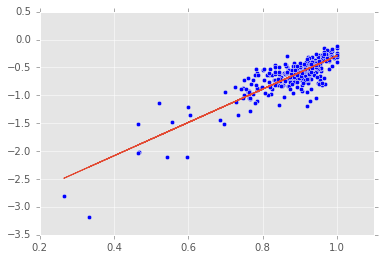

In [815]:
ps_data_disadvantaged_N = pd.concat([college_school_disadvantaged_N,diploma_school_disadvantaged_N],axis=1).dropna()
ps_data_disadvantaged_N['PS_RATE'] = ps_data_disadvantaged_N.PS_ENROLLMENT_CNT/ps_data_disadvantaged_N.COHORT_CNT
ps_data_disadvantaged_N['INV_DROPOUT_RATE'] = (1-ps_data_disadvantaged_N.DROPOUT_RATE)
ps_data_disadvantaged_N.DIPLOMA_RATE = ps_data_disadvantaged_N.DIPLOMA_RATE/100
ps_data_disadvantaged_N['LOG_PS_RATE'] = np.log(ps_data_disadvantaged_N.PS_RATE)
ps_data_disadvantaged_N['LOG_DIPLOMA_RATE'] = np.log(ps_data_disadvantaged_N.DIPLOMA_RATE)
ps_data_disadvantaged_N['LOG_INV_DROPOUT_RATE'] = np.log(ps_data_disadvantaged_N.INV_DROPOUT_RATE)
ps_disadvantaged_N_regress = stats.linregress(ps_data_disadvantaged_N['DIPLOMA_RATE'],ps_data_disadvantaged_N['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data_disadvantaged_N['DIPLOMA_RATE'],ps_disadvantaged_N_regress[1]+ps_disadvantaged_N_regress[0]*ps_data_disadvantaged_N['DIPLOMA_RATE'])
ax.scatter(ps_data_disadvantaged_N['DIPLOMA_RATE'], ps_data_disadvantaged_N['LOG_PS_RATE'])
ps_disadvantaged_N_regress

In [786]:
diploma_ps_model_disadvantaged_N = sm.RLM(ps_data_disadvantaged_N['LOG_PS_RATE'],sm.add_constant(ps_data_disadvantaged_N['DIPLOMA_RATE']))
diploma_ps_results_disadvantaged_N = diploma_ps_model_disadvantaged_N.fit()
diploma_ps_results_disadvantaged_N.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                  318
Model:                            RLM   Df Residuals:                      316
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:21:39                                         
No. Iterations:                    32                                         
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.1554      0.081    -39.175      0.000        -3.313    -2.997
DIPLOMA_RATE     2.8646      0.091     31.554      0.000         2.687     3.043
================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [796]:
diploma_school_lep = diploma_school[diploma_school.GENDER.isnull()&diploma_school.FEDERAL_RACE_CODE.isnull()&diploma_school.DISABILITY_FLAG.isnull()&(diploma_school.LEP_FLAG=='Y')&diploma_school.DISADVANTAGED_FLAG.isnull()]
diploma_school_lep.index = diploma_school_lep[['DIV_NAME','SCH_NAME']]
diploma_school_lep = diploma_school_lep.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_school_lep['DROPOUT_RATE'] = diploma_school_disadvantaged_N.DROPOUT_CNT/diploma_school_disadvantaged_N.COHORT_CNT

college_school_lep = college_school[college_school.GENDER.isnull()&college_school.FEDERAL_RACE_CODE.isnull()&college_school.DISABILITY_FLAG.isnull()&(college_school.LEP_FLAG=='Y')&college_school.DISADVANTAGED_FLAG.isnull()&college_school.PS_INSTITUTION_TYPE.isnull()]
college_school_lep.index = college_school_lep[['DIV_NAME','SCH_NAME']]
college_school_lep = college_school_lep.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_GRADUATE_CNT','PS_INSTITUTION_TYPE'],axis=1)


LinregressResult(slope=2.7682223276673001, intercept=-2.9629707491574724, rvalue=0.6840196250250189, pvalue=9.7001573570421066e-12, stderr=0.34317858123598932)

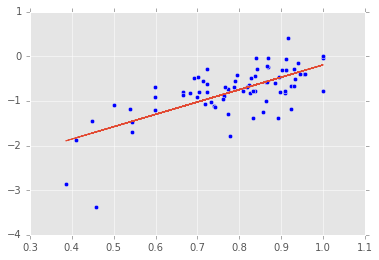

In [816]:
ps_data_lep = pd.concat([college_school_lep,diploma_school_lep],axis=1).dropna()
ps_data_lep['PS_RATE'] = ps_data_lep.PS_ENROLLMENT_CNT/ps_data_lep.COHORT_CNT
ps_data_lep['INV_DROPOUT_RATE'] = (1-ps_data_lep.DROPOUT_RATE)
ps_data_lep.DIPLOMA_RATE = ps_data_lep.DIPLOMA_RATE/100
ps_data_lep['LOG_PS_RATE'] = np.log(ps_data_lep.PS_RATE)
ps_data_lep['LOG_DIPLOMA_RATE'] = np.log(ps_data_lep.DIPLOMA_RATE)
ps_data_lep['LOG_INV_DROPOUT_RATE'] = np.log(ps_data_lep.INV_DROPOUT_RATE)
ps_lep_regress = stats.linregress(ps_data_lep['DIPLOMA_RATE'],ps_data_lep['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data_lep['DIPLOMA_RATE'],ps_lep_regress[1]+ps_lep_regress[0]*ps_data_lep['DIPLOMA_RATE'])
ax.scatter(ps_data_lep['DIPLOMA_RATE'], ps_data_lep['LOG_PS_RATE'])
ps_lep_regress

In [798]:
diploma_ps_model_lep = sm.RLM(ps_data_lep['LOG_PS_RATE'],sm.add_constant(ps_data_lep['DIPLOMA_RATE']))
diploma_ps_results_lep = diploma_ps_model_lep.fit()
diploma_ps_results_lep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                   76
Model:                            RLM   Df Residuals:                       74
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:29:02                                         
No. Iterations:                    19                                         
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -2.5772      0.220    -11.731      0.000        -3.008    -2.147
DIPLOMA_RATE     2.3379      0.275      8.513      0.000         1.800     2.876
================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [799]:
diploma_school_lep_N = diploma_school[diploma_school.GENDER.isnull()&diploma_school.FEDERAL_RACE_CODE.isnull()&diploma_school.DISABILITY_FLAG.isnull()&(diploma_school.LEP_FLAG=='N')&diploma_school.DISADVANTAGED_FLAG.isnull()]
diploma_school_lep_N.index = diploma_school_lep_N[['DIV_NAME','SCH_NAME']]
diploma_school_lep_N = diploma_school_lep_N.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG'],axis=1)
diploma_school_lep_N['DROPOUT_RATE'] = diploma_school_lep_N.DROPOUT_CNT/diploma_school_lep_N.COHORT_CNT

college_school_lep_N = college_school[college_school.GENDER.isnull()&college_school.FEDERAL_RACE_CODE.isnull()&college_school.DISABILITY_FLAG.isnull()&(college_school.LEP_FLAG=='N')&college_school.DISADVANTAGED_FLAG.isnull()&college_school.PS_INSTITUTION_TYPE.isnull()]
college_school_lep_N.index = college_school_lep_N[['DIV_NAME','SCH_NAME']]
college_school_lep_N = college_school_lep_N.drop(['DIV_NAME','SCH_NAME','GENDER','FEDERAL_RACE_CODE','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_GRADUATE_CNT','PS_INSTITUTION_TYPE'],axis=1)


LinregressResult(slope=3.1342852685381217, intercept=-3.4804105988023859, rvalue=0.8260740481900779, pvalue=6.0511390423794183e-81, stderr=0.12009676199209908)

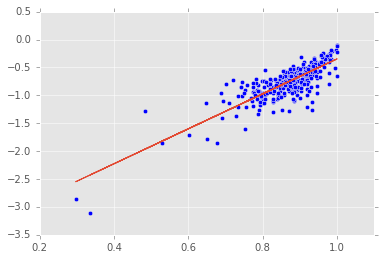

In [817]:
ps_data_lep_N = pd.concat([college_school_lep_N,diploma_school_lep_N],axis=1).dropna()
ps_data_lep_N['PS_RATE'] = ps_data_lep_N.PS_ENROLLMENT_CNT/ps_data_lep_N.COHORT_CNT
ps_data_lep_N['INV_DROPOUT_RATE'] = (1-ps_data_lep_N.DROPOUT_RATE)
ps_data_lep_N.DIPLOMA_RATE = ps_data_lep_N.DIPLOMA_RATE/100
ps_data_lep_N['LOG_PS_RATE'] = np.log(ps_data_lep_N.PS_RATE)
ps_data_lep_N['LOG_DIPLOMA_RATE'] = np.log(ps_data_lep_N.DIPLOMA_RATE)
ps_data_lep_N['LOG_INV_DROPOUT_RATE'] = np.log(ps_data_lep_N.INV_DROPOUT_RATE)
ps_lep_N_regress = stats.linregress(ps_data_lep_N['DIPLOMA_RATE'],ps_data_lep_N['LOG_PS_RATE'])
fig, ax = plt.subplots()
ax.plot(ps_data_lep_N['DIPLOMA_RATE'],ps_lep_N_regress[1]+ps_lep_N_regress[0]*ps_data_lep_N['DIPLOMA_RATE'])
ax.scatter(ps_data_lep_N['DIPLOMA_RATE'], ps_data_lep_N['LOG_PS_RATE'])
ps_lep_N_regress

In [801]:
diploma_ps_model_lep_N = sm.RLM(ps_data_lep_N['LOG_PS_RATE'],sm.add_constant(ps_data_lep_N['DIPLOMA_RATE']))
diploma_ps_results_lep_N = diploma_ps_model_lep_N.fit()
diploma_ps_results_lep_N.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            LOG_PS_RATE   No. Observations:                  319
Model:                            RLM   Df Residuals:                      317
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 25 May 2016                                         
Time:                        15:31:16                                         
No. Iterations:                    23                                         
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.5187      0.094    -37.622      0.000        -3.702    -3.335
DIPLOMA_RATE     3.1895      0.107     29.820      0.000         2.980     3.399
================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""